In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")
sns.set_style("dark")

if running from server:

In [5]:
!mkdir -p data
!kaggle datasets download -d parisrohan/credit-score-classification -p ./data/ --unzip --force
# !unzip -u data/credit-score-classification.zip -d data

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
 84%|███████████████████████████████▉      | 8.00M/9.51M [00:01<00:00, 10.4MB/s]
100%|██████████████████████████████████████| 9.51M/9.51M [00:01<00:00, 8.67MB/s]


In [ ]:
# # non-windows moment 
# # Move to the parent directory
# %cd ..
# # Create the 'data' directory in the parent directory
# !mkdir -p data
# # Download the dataset to the 'data' directory in the parent directory
# !kaggle datasets download -d parisrohan/credit-score-classification -p ./data/

In [ ]:
# !unzip -u data/credit-score-classification.zip -d data
# %cd ./eda

Archive:  data/credit-score-classification.zip
[Errno 2] No such file or directory: './eda'
/app


if running from server:

In [6]:
train_df = pd.read_csv("data/train.csv", decimal=".", engine="python")
test_df = pd.read_csv("data/test.csv", decimal=".", engine="python")
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [7]:
# train_df = pd.read_csv("../data/train.csv", decimal=".", engine="python")
# test_df = pd.read_csv("../data/test.csv", decimal=".", engine="python")
# train_df

# EDA
Objective: Start by getting a basic understanding of the dataset. This includes checking the data types of columns, identifying missing values (NaNs), and understanding the overall structure of the data.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
duplicate_rows_df = train_df[train_df.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows_df))

number of duplicate rows:  0


In [10]:
train_df = train_df.drop_duplicates()
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


How many unique clients do we have?

In [11]:
len(train_df["Customer_ID"].unique())

12500

Identifying columns that are incorrectly typed (e.g., numerical data stored as strings) and casting them to the correct data types. This is important for accurate analysis and modeling.

In [12]:
problem_columns_float = [
    "Annual_Income",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Monthly_Balance",
]
train_df[problem_columns_float]

,Annual_Income,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,11.27,809.98,49.574949,80.41529543900253,312.49408867943663
1,19114.12,11.27,809.98,49.574949,118.28022162236736,284.62916249607184
2,19114.12,_,809.98,49.574949,81.699521264648,331.2098628537912
3,19114.12,6.27,809.98,49.574949,199.4580743910713,223.45130972736786
4,19114.12,11.27,809.98,49.574949,41.420153086217326,341.48923103222177
...,...,...,...,...,...,...
99995,39628.99,11.5,502.38,35.104023,60.97133255718485,479.86622816574095
99996,39628.99,11.5,502.38,35.104023,54.18595028760385,496.651610435322
99997,39628.99,11.5,502.38,35.104023,24.02847744864441,516.8090832742814
99998,39628.99,11.5,502.38,35.104023,251.67258219721603,319.1649785257098


In [13]:
train_df[problem_columns_float] = train_df[problem_columns_float].apply(
    pd.to_numeric, errors="coerce"
)
train_df[problem_columns_float] = train_df[problem_columns_float].astype("float64")
train_df.loc[:, problem_columns_float].fillna(
    value=train_df[problem_columns_float].median(),
    inplace=True,
)
train_df[problem_columns_float]

,Annual_Income,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,11.27,809.98,49.574949,80.415295,312.494089
1,19114.12,11.27,809.98,49.574949,118.280222,284.629162
2,19114.12,NaN,809.98,49.574949,81.699521,331.209863
3,19114.12,6.27,809.98,49.574949,199.458074,223.451310
4,19114.12,11.27,809.98,49.574949,41.420153,341.489231
...,...,...,...,...,...,...
99995,39628.99,11.50,502.38,35.104023,60.971333,479.866228
99996,39628.99,11.50,502.38,35.104023,54.185950,496.651610
99997,39628.99,11.50,502.38,35.104023,24.028477,516.809083
99998,39628.99,11.50,502.38,35.104023,251.672582,319.164979


In [14]:
problem_columns_int = ["Num_of_Loan", "Num_of_Delayed_Payment", "Age"]
train_df[problem_columns_int]

,Num_of_Loan,Num_of_Delayed_Payment,Age
0,4,7,23
1,4,NaN,23
2,4,7,-500
3,4,4,23
4,4,NaN,23
...,...,...,...
99995,2,7,25
99996,2,7,25
99997,2,6,25
99998,2,NaN,25


In [15]:
train_df[problem_columns_int] = train_df[problem_columns_int].apply(
    pd.to_numeric, errors="coerce"
)
train_df[problem_columns_int] = train_df[problem_columns_int].astype(pd.Int32Dtype())
train_df.loc[:, problem_columns_int].fillna(
    value=train_df[problem_columns_int].median(), inplace=True
)
train_df[problem_columns_int]

,Num_of_Loan,Num_of_Delayed_Payment,Age
0,4,7,23
1,4,<NA>,23
2,4,7,-500
3,4,4,23
4,4,<NA>,23
...,...,...,...
99995,2,7,25
99996,2,7,25
99997,2,6,25
99998,2,<NA>,25


Prepare separate variables for different column types:

In [16]:
number_columns = train_df.select_dtypes("number").columns
categorical_columns = train_df.select_dtypes("object").columns.drop("Credit_Score")
feature_columns = categorical_columns.union(number_columns)
target = train_df["Credit_Score"]
number_columns, categorical_columns

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
       dtype='object'),
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
        'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
        'Payment_of_Min_Amount', 'Payment_Behaviour'],
       dtype='object'))

In [17]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.0,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.0,100000.000000,90254.0,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.50094,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499
min,-500.0,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.0,-5.000000,-3.0,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.0,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.0,10.000000,9.0,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630
50%,33.0,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.0,18.000000,14.0,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225
75%,42.0,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.0,28.000000,18.0,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938
max,8698.0,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.0,67.000000,4397.0,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   Int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   Int32  
 13  Type_of_Loan              88592 non-null   ob

## Some outliers

Identify and address outliers in the dataset, such as negative values where they don't make sense (e.g., age cannot be negative), or unrealistic values like an age of 8698.

In [19]:
train_df = train_df.drop(
    train_df[
        (train_df["Age"] < 0)
        | (train_df["Age"] > 100)
        | (train_df["Num_Bank_Accounts"] < 0)
        | (train_df["Num_of_Loan"] < 0)
        | (train_df["Num_of_Delayed_Payment"] < 0)
        | (train_df["Delay_from_due_date"] < 0)
    ].index
)
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


## Various plots
Using visualizations like box plots and pie charts to get insights into the distribution of data, detect outliers, and understand categorical distributions.

### Box plots

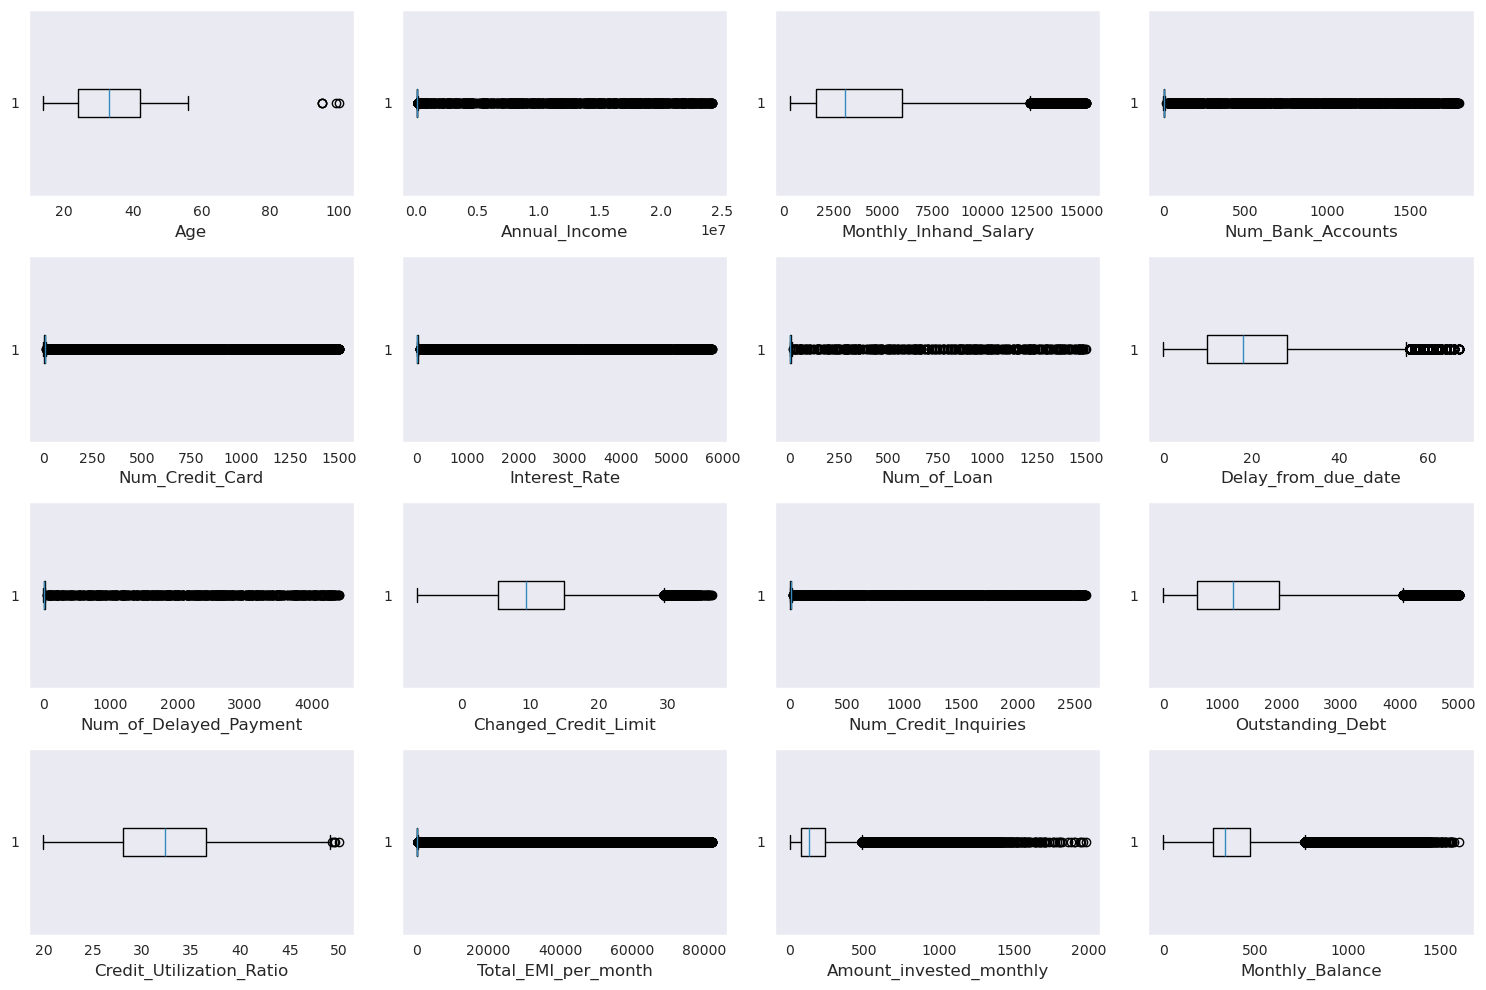

In [20]:
def plot_box_data(df):
    box_data = df[
        number_columns
    ]

    nrows = 4

    fig, axes = plt.subplots(nrows, len(number_columns)//nrows, figsize=(15, 10))

    for i, column in enumerate(box_data.columns):
        row = i // (len(number_columns) // nrows)  
        col = i % (len(number_columns) // nrows) 


        non_nan_data = box_data[column].dropna()
        axes[row, col].boxplot(non_nan_data, vert=False)
        axes[row, col].set_xlabel(column)

    plt.tight_layout()
    plt.show()
plot_box_data(train_df)

This box plot shows that there are many outliers (points outside the whiskers), indicating possible data issues or extreme variability.

#### Box plots with group by "Credit Score"

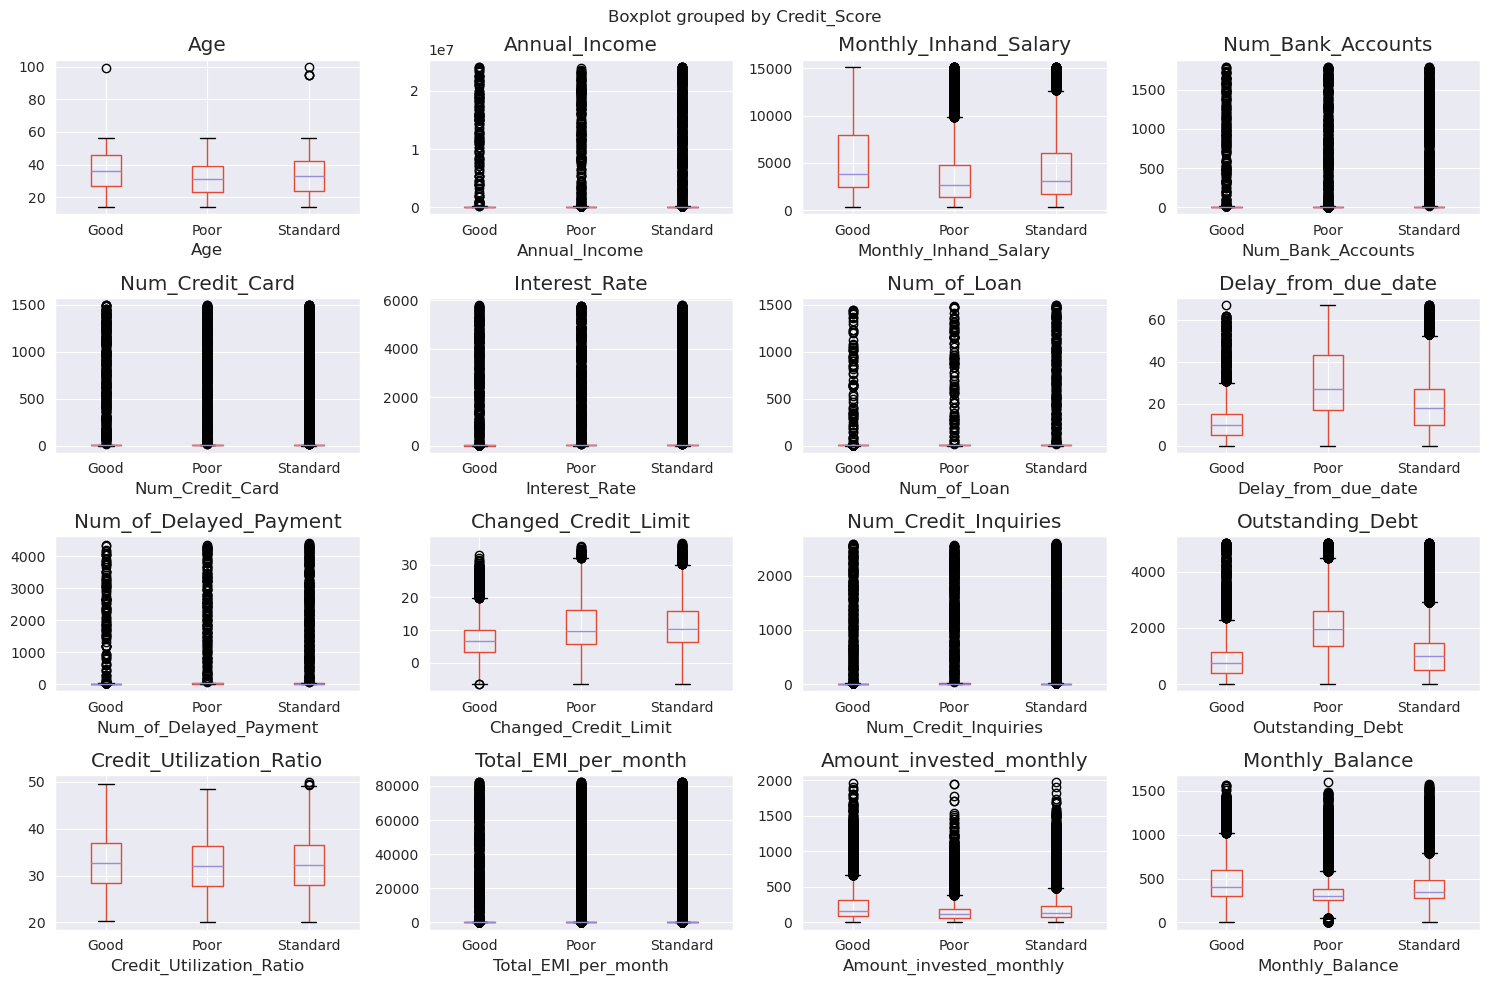

In [21]:
def box_plot_groupby(df, number_columns, by="Credit_Score"):
    nrows = 4  
    ncols = (len(number_columns) + nrows - 1) // nrows  
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))

    axes = axes.flatten()

    for i, column in enumerate(number_columns):
        df.boxplot(column=column, by=by, ax=axes[i])
        
        axes[i].set_xlabel(column)

    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
box_plot_groupby(train_df, number_columns)

Boxplots visually detect outliers by marking data points that lie outside the "whiskers." These outliers are generally identified using the Interquartile Range (IQR) method:

    Q1: The first quartile (25th percentile)
    Q3: The third quartile (75th percentile)
    IQR: The interquartile range, calculated as Q3 - Q1
    Lower Bound: Q1 - 1.5 * IQR
    Upper Bound: Q3 + 1.5 * IQR

Any data points outside this range are considered outliers.

In [22]:
def remove_outliers_all_columns(df, columns):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for all specified columns
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR) for each column
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply the filter: keep rows that are within the bounds for all columns
    filtered_df = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    
    return filtered_df

# Example usage
train_df = remove_outliers_all_columns(train_df, number_columns)
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good


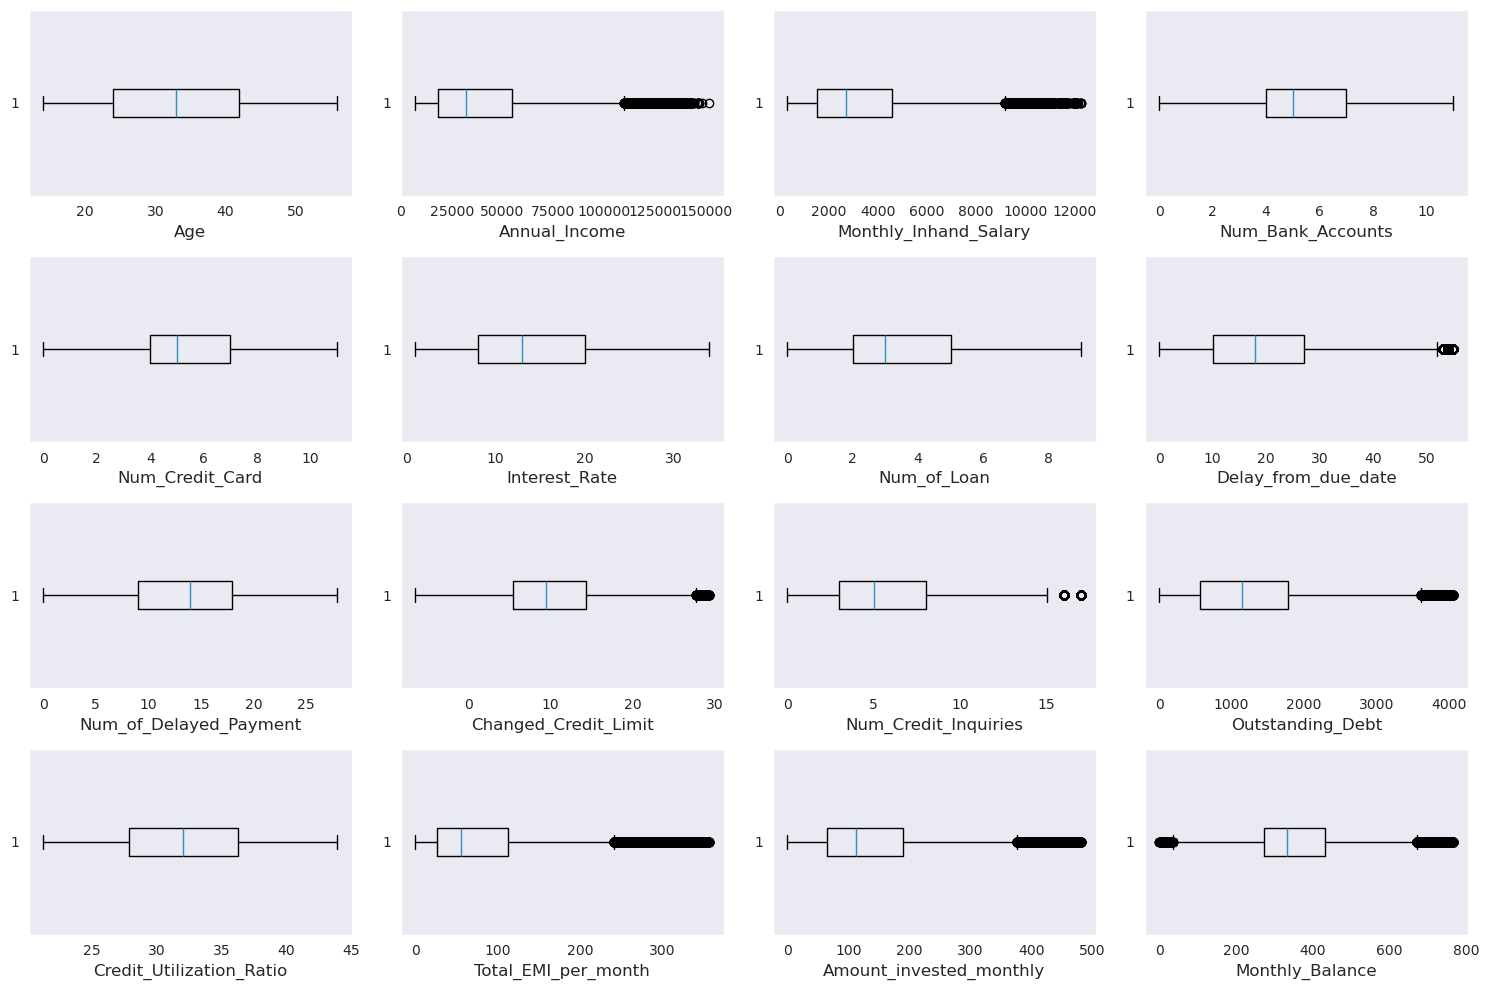

In [23]:
plot_box_data(train_df)

### Pie charts

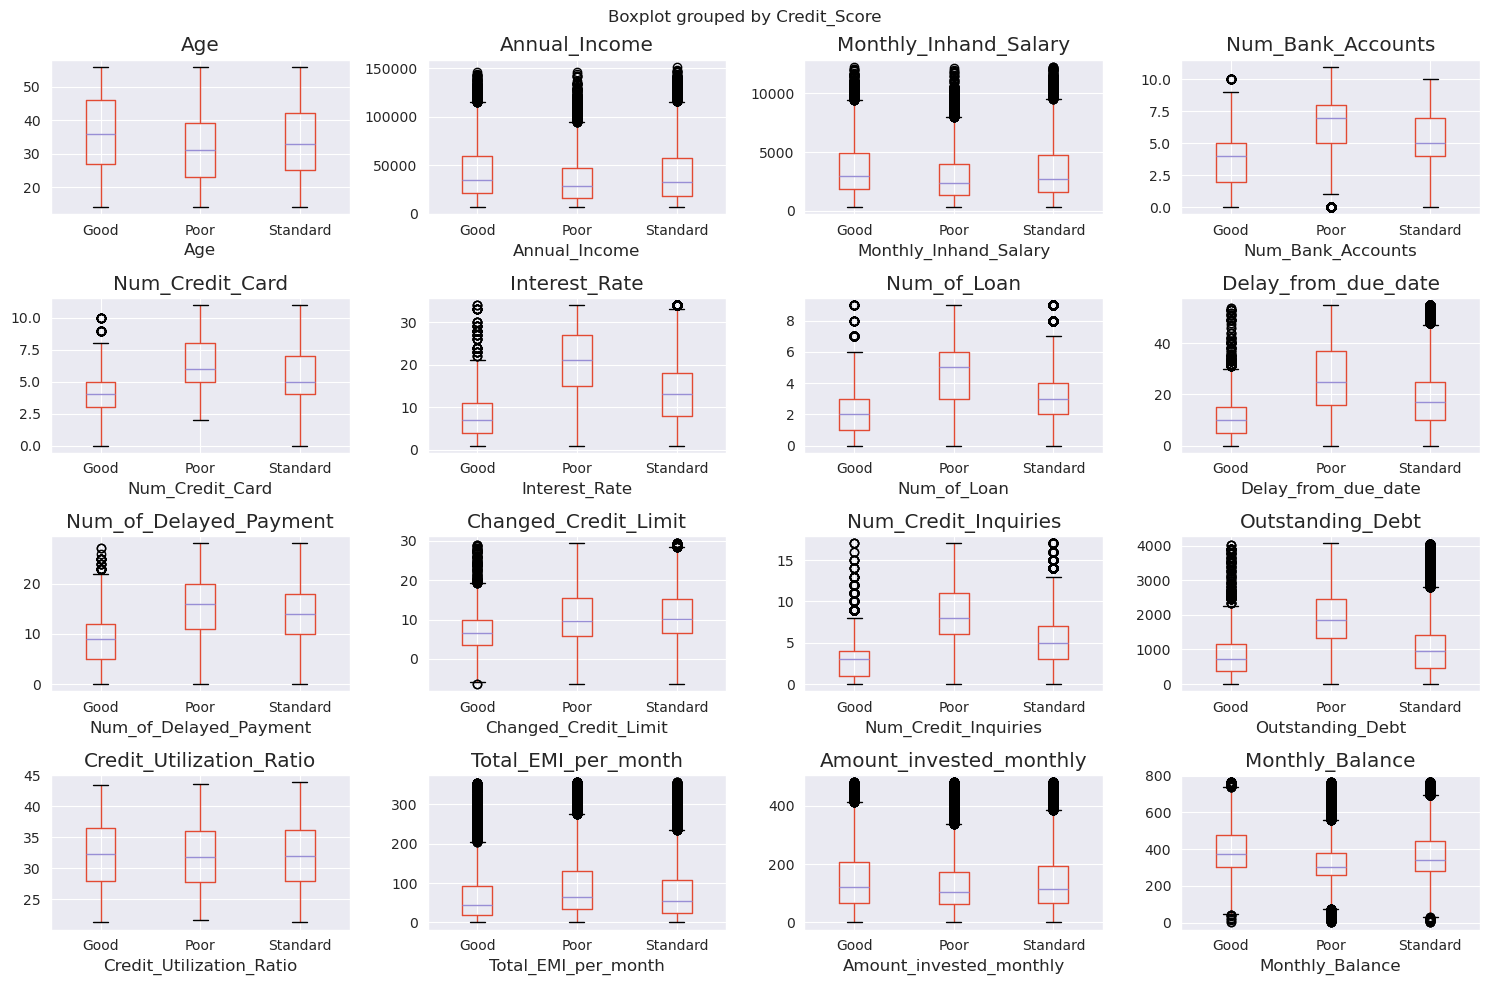

In [24]:
box_plot_groupby(train_df, number_columns)

In [25]:
train_df[
    [
        "Month",
        "Occupation",
        "Type_of_Loan",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
].value_counts()

Month     Occupation     Type_of_Loan                      Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour                 Credit_Score
February  Musician       Auto Loan                         Standard    Yes                    High_spent_Medium_value_payments  Standard        4
          Mechanic       Not Specified                     Standard    Yes                    Low_spent_Small_value_payments    Standard        4
May       _______        Credit-Builder Loan               Good        No                     High_spent_Medium_value_payments  Good            4
March     Engineer       Debt Consolidation Loan           Standard    Yes                    Low_spent_Small_value_payments    Standard        3
April     Entrepreneur   Not Specified                     Standard    Yes                    Low_spent_Small_value_payments    Standard        3
                                                                                                                                 

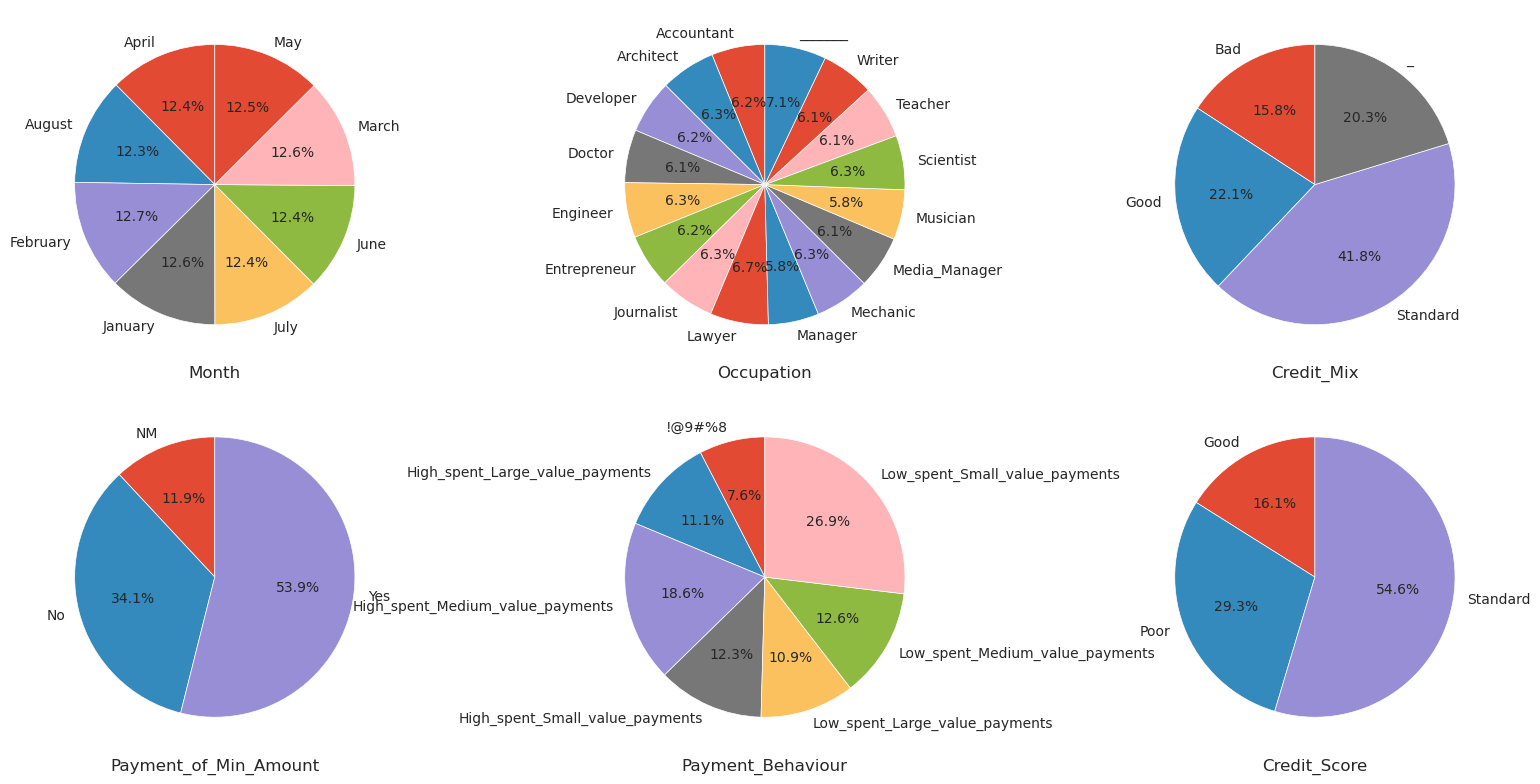

In [26]:
pie_data = train_df[
    [
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
]

nrows = 2
ncols = 3  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))

for i, column in enumerate(pie_data.columns):
    row = i // ncols
    col = i % ncols

    grouped_data = pie_data.groupby(column).size().reset_index(name="counts")

    # Extract data for the pie chart
    labels = grouped_data[column]
    sizes = grouped_data["counts"]

    # Plot pie chart in the correct subplot
    axes[row, col].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    axes[row, col].set_xlabel(column)


plt.tight_layout()
plt.show()

This pie chart shows the distribution of categories within 'categorical_column'. It reveals that some categories dominate the dataset, while others are underrepresented.

#### Donut charts (nested pie charts)

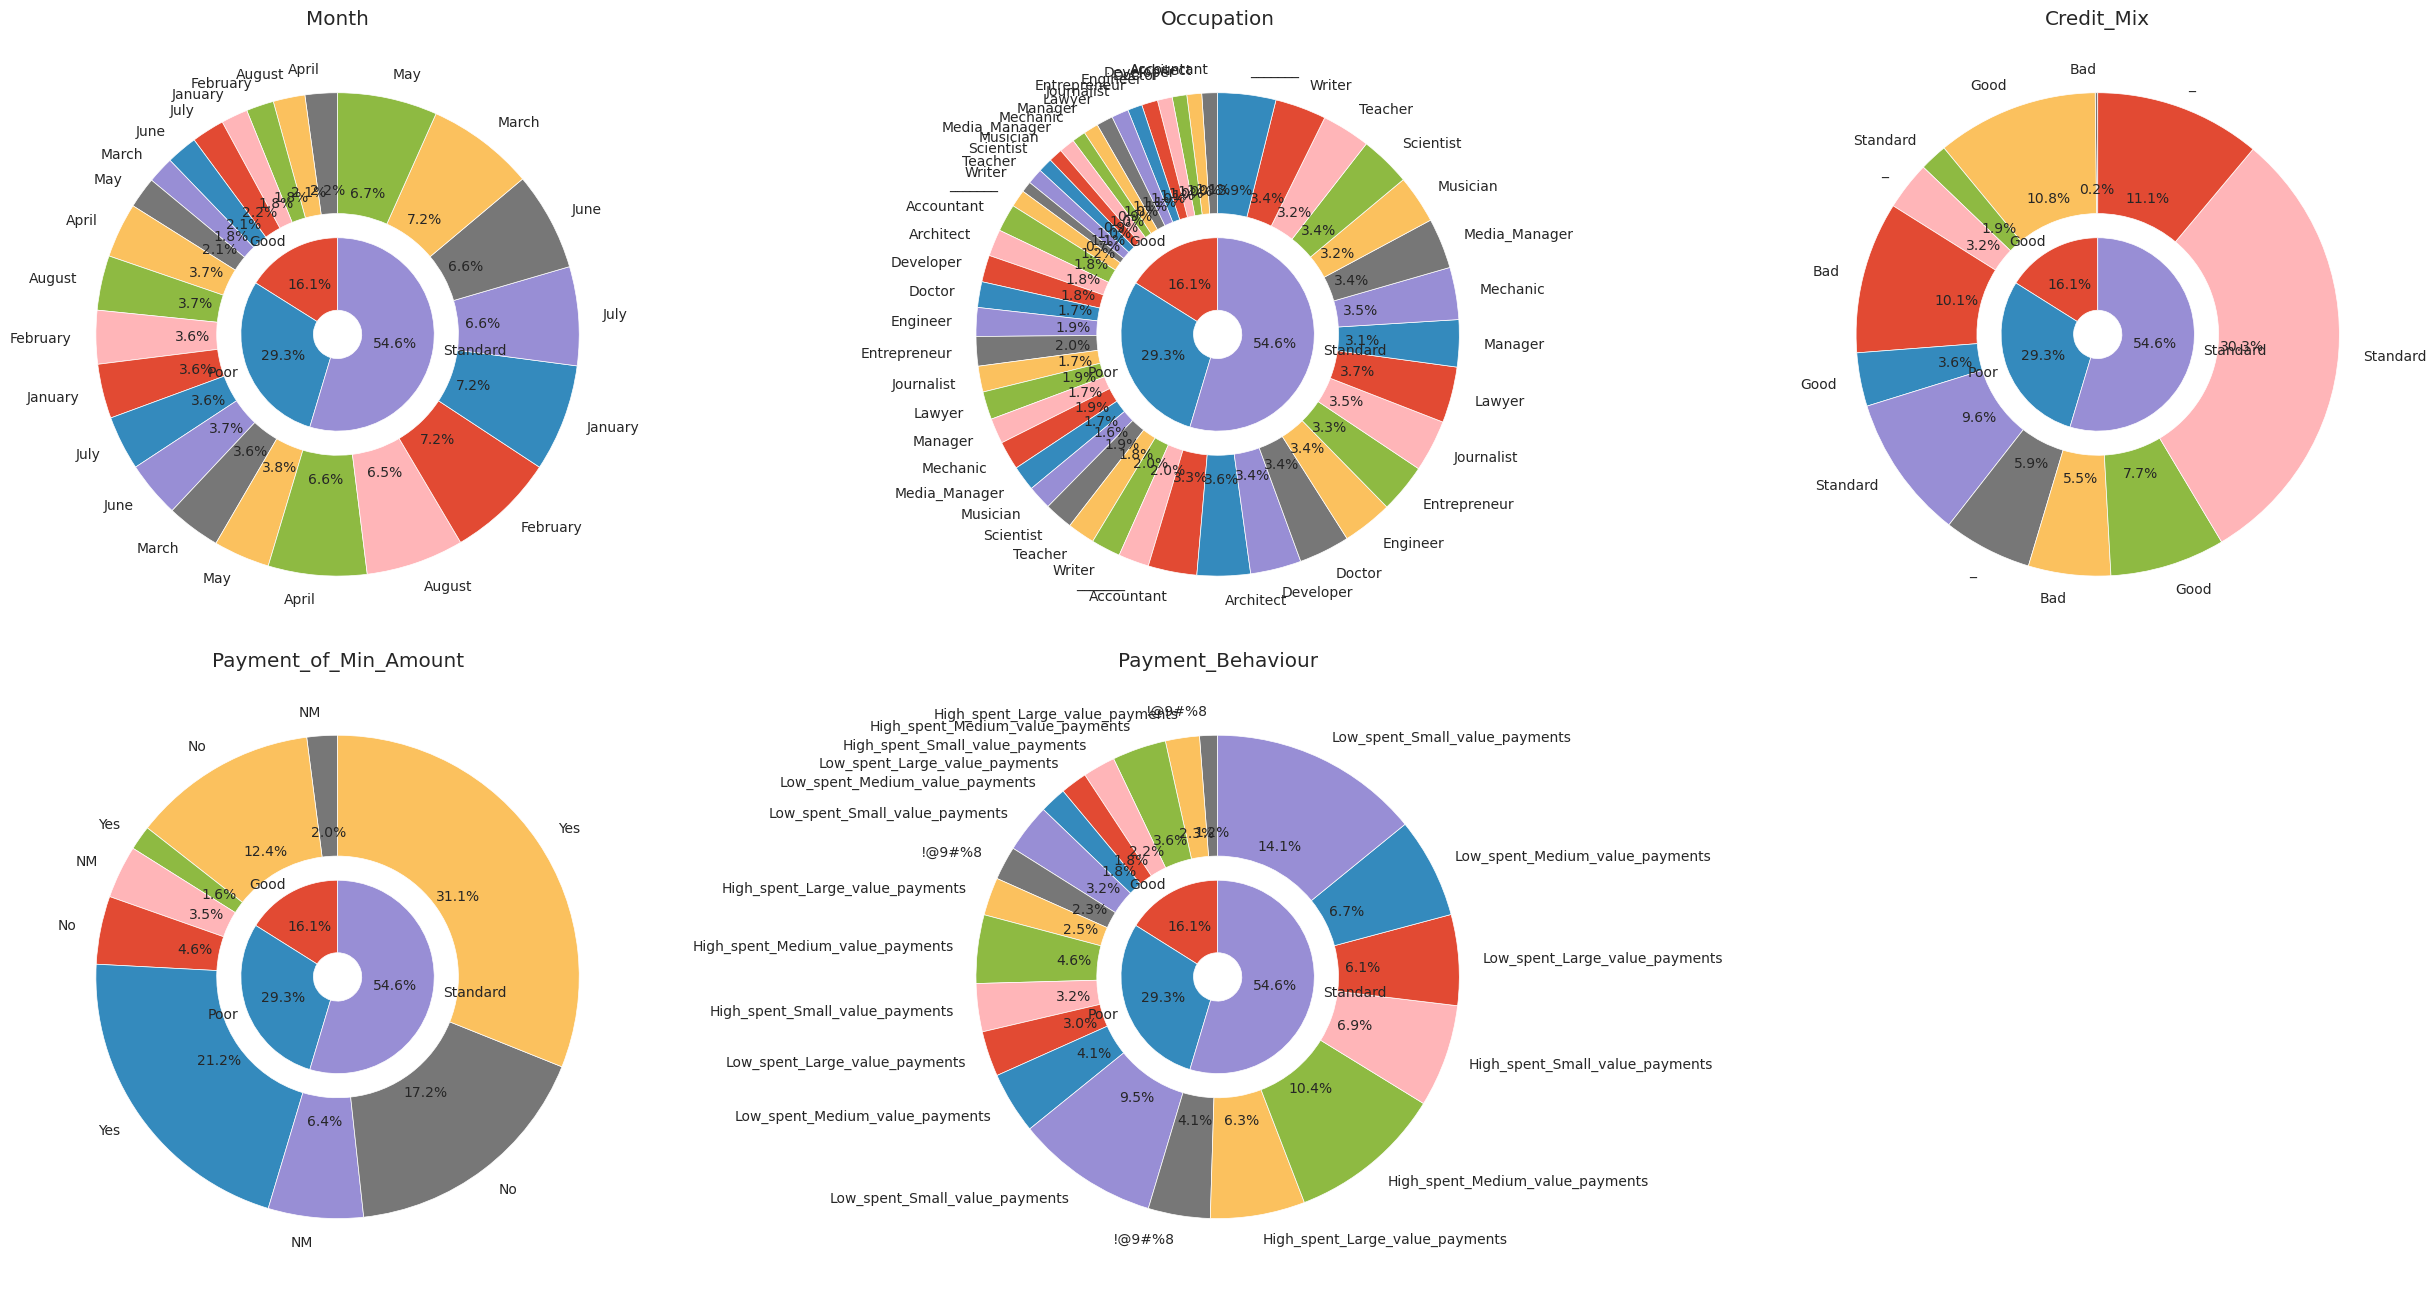

In [27]:
pie_data = train_df[
    [
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
]

# Group by 'Credit_Score' for the inner layer
inner_group = pie_data.groupby('Credit_Score').size().reset_index(name='counts')
inner_labels = inner_group['Credit_Score']
inner_sizes = inner_group['counts']

# Define the outer layers (columns other than 'Credit_Score')
outer_columns = ["Month", "Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]

nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 13))

for i, column in enumerate(outer_columns):
    outer_group = pie_data.groupby(['Credit_Score', column]).size().reset_index(name='counts')
    
    row = i // ncols
    col = i % ncols

    # Create the outer labels and sizes based on the groups
    outer_labels = outer_group[column]
    outer_sizes = outer_group['counts']
    
    # Create the donut chart
    axes[row, col].pie(inner_sizes, labels=inner_labels, radius=0.4, wedgeprops=dict(width=0.3, edgecolor='w'), autopct="%1.1f%%", startangle=90)
    axes[row, col].pie(outer_sizes, labels=outer_labels, radius=1.0, wedgeprops=dict(width=0.5, edgecolor='w'), autopct="%1.1f%%", startangle=90)
    
    # Add title for the outer layer
    axes[row, col].set_title(column)

fig.delaxes(axes[1, 2])
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

looks ugly

In [28]:
train_df.groupby("Customer_ID")[number_columns].mean()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Customer_ID,,,,,,,,,,,,,,,,
CUS_0x1009,25.833333,52312.680,4250.390000,6.0,5.0,17.0,4.0,6.666667,17.833333,9.730000,3.333333,202.68,31.674017,108.366467,123.462267,448.210266
CUS_0x1011,44.0,58918.470,5208.872500,3.0,3.0,17.0,3.0,27.333333,13.75,14.086667,7.000000,473.14,27.873346,123.434939,218.639063,395.078194
CUS_0x1013,43.6,98620.980,7962.415000,3.0,3.0,6.0,3.0,12.800000,9.0,1.930000,3.000000,1233.51,32.661853,228.018084,278.066656,546.156760
CUS_0x1015,27.0,46951.020,3725.585000,7.0,4.0,16.0,0.0,8.000000,9.142857,16.496667,7.571429,340.22,35.795961,0.000000,263.812274,399.041977
CUS_0x1018,15.0,61194.810,5014.567500,7.0,7.0,23.0,8.0,23.166667,21.666667,28.630000,8.000000,2773.09,29.289387,225.368691,229.650635,314.770757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUS_0xff3,55.0,17032.785,1176.398750,0.0,6.0,2.0,3.0,12.400000,8.75,8.060000,3.800000,1229.08,32.567133,33.299764,80.348860,275.991252
CUS_0xff4,36.857143,25546.260,2415.855000,8.0,7.0,14.0,5.0,15.857143,11.833333,8.258571,5.000000,758.44,33.010668,101.328637,131.697470,278.559393
CUS_0xff6,18.5,117639.920,9727.326667,5.0,6.0,1.0,2.0,1.000000,3.5,10.400000,2.000000,338.30,40.022538,126.638453,355.980791,745.113422


## Dealing with Missing Values & Feature Extraction
**Objective**: Identify columns with missing values and decide how to handle them (e.g., drop, fill, or impute). Also, extract new features from existing data to enhance the dataset.

Finding nulls in data:

In [29]:
train_df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        6035
Age                         3051
SSN                            0
Occupation                     0
Annual_Income               4305
Monthly_Inhand_Salary       9090
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 3028
Type_of_Loan                6226
Delay_from_due_date            0
Num_of_Delayed_Payment      5970
Changed_Credit_Limit        1249
Num_Credit_Inquiries        1174
Credit_Mix                     0
Outstanding_Debt             628
Credit_Utilization_Ratio       0
Credit_History_Age          5568
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     5661
Payment_Behaviour              0
Monthly_Balance               98
Credit_Score                   0
dtype: int64

The 'Name' column is not crucial for our analysis since we have 'ID' as a unique identifier. We can safely drop the 'Name' column.

In [30]:
def delete_col(cols):
    """
    Drops a specified column from the DataFrame and its associated index variable.
    """
    global train_df, categorical_columns, number_columns
    train_df.drop(columns=cols, inplace=True)

    for col in cols:
        if col in categorical_columns:
            categorical_columns = categorical_columns.drop(col)
        else:
            number_columns = number_columns.drop(col)


delete_col(["Name", "ID", "SSN"])

/tmp/ipykernel_79/916336321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=cols, inplace=True)


Although usage of `nonlocal` is not recommended, in this case it is okay.

In [31]:
train_df["Credit_History_Age"].value_counts()

Credit_History_Age
19 Years and 5 Months     292
15 Years and 9 Months     289
17 Years and 11 Months    288
19 Years and 9 Months     287
19 Years and 10 Months    286
                         ... 
0 Years and 3 Months        9
33 Years and 8 Months       8
33 Years and 7 Months       8
0 Years and 2 Months        7
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

### Transforming `Credit_History_Age`

In [32]:
train_df["Credit_History_Age"]

0         22 Years and 1 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
5         22 Years and 6 Months
6         22 Years and 7 Months
                  ...          
99994     31 Years and 5 Months
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 60557, dtype: object

Convert the `Credit_History_Age` column to a int format to facilitate analysis and avoid creating too many columns during one-hot encoding.

In [33]:
split_credit_history = train_df["Credit_History_Age"].str.extract(
    r"(\d+)\sYears\sand\s(\d+)\sMonths"
)

total_months = split_credit_history[0].astype(
    pd.Int32Dtype()
) * 12 + split_credit_history[1].astype(pd.Int32Dtype())

train_df["Credit_History_Age"] = total_months
total_months

/tmp/ipykernel_79/1496175893.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Credit_History_Age"] = total_months


0        265
3        268
4        269
5        270
6        271
        ... 
99994    377
99995    378
99996    379
99998    381
99999    382
Length: 60557, dtype: Int32

### Handling `Type_of_Loan`
By splitting and exploding 'Type_of_Loan', we can handle cases where a single individual has multiple loans, making the data more granular and accurate for analysis.

In [34]:
train_df["Type_of_Loan"].value_counts().head(20)

Type_of_Loan
Not Specified                                       782
Personal Loan                                       759
Debt Consolidation Loan                             717
Credit-Builder Loan                                 712
Student Loan                                        708
Payday Loan                                         676
Auto Loan                                           674
Mortgage Loan                                       665
Home Equity Loan                                    661
Student Loan, and Payday Loan                       175
Personal Loan, and Student Loan                     171
Payday Loan, and Personal Loan                      169
Student Loan, and Credit-Builder Loan               169
Credit-Builder Loan, and Not Specified              161
Mortgage Loan, and Home Equity Loan                 160
Payday Loan, and Student Loan                       160
Debt Consolidation Loan, and Home Equity Loan       157
Auto Loan, and Personal Loan       

In [35]:
loan_types = [
    "Not Specified",
    "Credit-Builder Loan",
    "Personal Loan",
    "Debt Consolidation Loan",
    "Student Loan",
    "Payday Loan",
    "Mortgage Loan",
    "Auto Loan",
    "Home Equity Loan",
]

train_df["Type_of_Loan"].fillna("", inplace=True)
for suffix in loan_types:
    train_df["Type_of_Loan_" + suffix] = train_df["Type_of_Loan"].apply(
        lambda x: suffix in x.split(", ")
    )

delete_col(["Type_of_Loan"])

/tmp/ipykernel_79/65363886.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Type_of_Loan"].fillna("", inplace=True)
/tmp/ipykernel_79/65363886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Type_of_Loan"].fillna("", inplace=True)
/tmp/ipykernel_79/65363886.py:15: SettingWithCopyWarning: 
A value is trying to be se

In [36]:
train_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Type_of_Loan_Not Specified,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Student Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Auto Loan,Type_of_Loan_Home Equity Loan
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
5,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Poor,False,False,False,False,False,False,False,True,False
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Poor,False,False,False,False,False,False,False,True,False
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Poor,False,False,False,False,False,False,False,True,False
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Standard,False,False,False,False,False,False,False,True,False


In [37]:
categorical_columns = categorical_columns.drop("Credit_History_Age")
number_columns = number_columns.append(pd.Index(["Credit_History_Age"]))
number_columns, categorical_columns

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
        'Credit_History_Age'],
       dtype='object'),
 Index(['Customer_ID', 'Month', 'Occupation', 'Credit_Mix',
        'Payment_of_Min_Amount', 'Payment_Behaviour'],
       dtype='object'))

In [38]:
train_df = pd.get_dummies(
    train_df,
    columns=[
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
    ],
    drop_first=True,
)
train_df = pd.get_dummies(train_df, columns=["Credit_Score"])
train_df

,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,3,7,...,False,False,False,True,False,False,False,True,False,False
3,CUS_0xd40,23,19114.12,NaN,3,4,3,4,5,4,...,False,False,False,False,False,False,True,True,False,False
4,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,6,<NA>,...,False,False,True,False,False,False,False,True,False,False
5,CUS_0xd40,23,19114.12,NaN,3,4,3,4,8,4,...,False,False,False,False,False,False,False,True,False,False
6,CUS_0xd40,23,19114.12,1824.843333,3,4,3,4,3,<NA>,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,20,6,...,False,False,True,False,False,False,False,False,True,False
99995,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,23,7,...,False,True,False,False,False,False,False,False,True,False
99996,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,18,7,...,False,False,True,False,False,False,False,False,True,False
99998,CUS_0x942c,25,39628.99,3359.415833,4,6,7,2,20,<NA>,...,False,False,False,False,True,False,False,False,False,True


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60557 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Customer_ID                                         60557 non-null  object 
 1   Age                                                 57506 non-null  Int32  
 2   Annual_Income                                       56252 non-null  float64
 3   Monthly_Inhand_Salary                               51467 non-null  float64
 4   Num_Bank_Accounts                                   60557 non-null  int64  
 5   Num_Credit_Card                                     60557 non-null  int64  
 6   Interest_Rate                                       60557 non-null  int64  
 7   Num_of_Loan                                         57529 non-null  Int32  
 8   Delay_from_due_date                                 60557 non-null  int64  
 9   

In [40]:
from sklearn.impute import KNNImputer, SimpleImputer

id_column = train_df['Customer_ID']
features = train_df.drop(columns=['Customer_ID'])

knn_imputer = KNNImputer(
    n_neighbors=1
)  # at least 1 neighbor, because running one cell for 7 minutes is too harsh
# knn_imputer = SimpleImputer(strategy='median')


X_knn_imputed = knn_imputer.fit_transform(features)
X_knn_imputed

array([[2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+01, 1.91141200e+04, 1.82484333e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.50000000e+01, 3.96289900e+04, 3.35941583e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [41]:
train_df_knn_imputed = pd.DataFrame(X_knn_imputed, columns=features.columns, index=features.index).astype(features.dtypes.to_dict())
result_df = train_df_knn_imputed.copy()
result_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,False,False,False,True,False,False,False,True,False,False
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,False,False,False,False,False,False,True,True,False,False
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,...,False,False,True,False,False,False,False,True,False,False
5,23,19114.12,1824.843333,3,4,3,4,8,4,9.27,...,False,False,False,False,False,False,False,True,False,False
6,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,...,False,False,True,False,False,False,False,False,True,False
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,False,True,False,False,False,False,False,False,True,False
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,False,False,True,False,False,False,False,False,True,False
99998,25,39628.99,3359.415833,4,6,7,2,20,1,11.50,...,False,False,False,False,True,False,False,False,False,True


In [42]:
id_column

0         CUS_0xd40
3         CUS_0xd40
4         CUS_0xd40
5         CUS_0xd40
6         CUS_0xd40
            ...    
99994    CUS_0x942c
99995    CUS_0x942c
99996    CUS_0x942c
99998    CUS_0x942c
99999    CUS_0x942c
Name: Customer_ID, Length: 60557, dtype: object

In [43]:
train_df_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60557 entries, 0 to 99999
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 60557 non-null  Int32  
 1   Annual_Income                                       60557 non-null  float64
 2   Monthly_Inhand_Salary                               60557 non-null  float64
 3   Num_Bank_Accounts                                   60557 non-null  int64  
 4   Num_Credit_Card                                     60557 non-null  int64  
 5   Interest_Rate                                       60557 non-null  int64  
 6   Num_of_Loan                                         60557 non-null  Int32  
 7   Delay_from_due_date                                 60557 non-null  int64  
 8   Num_of_Delayed_Payment                              60557 non-null  Int32  
 9   

# Baseline
Creating a simple baseline model before diving into complex modeling. This helps to understand the minimum performance we can expect.

In [44]:
preprocessed_df = train_df_knn_imputed.drop(
        columns=["Credit_Score_Good", "Credit_Score_Standard", "Credit_Score_Poor"]
    )
preprocessed_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,False,True,True,False,False,False,True,False,False,False
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,False,False,True,False,False,False,False,False,False,True
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,...,False,False,True,False,False,True,False,False,False,False
5,23,19114.12,1824.843333,3,4,3,4,8,4,9.27,...,False,False,True,False,False,False,False,False,False,False
6,23,19114.12,1824.843333,3,4,3,4,3,4,11.27,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6,9.50,...,False,True,True,False,False,True,False,False,False,False
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,False,True,True,False,True,False,False,False,False,False
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,False,True,True,False,False,True,False,False,False,False
99998,25,39628.99,3359.415833,4,6,7,2,20,1,11.50,...,False,False,True,False,False,False,False,True,False,False


In [45]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df,
    target[preprocessed_df.index],
    test_size=0.33,
    random_state=42,
)

dummy_classifier = DummyClassifier(random_state=42)
dummy_classifier.fit(X_train, y_train)
dummy_classifier.predict(X_test)

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Standard',
       'Standard'], dtype='<U8')

In [46]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, dummy_classifier.predict(X_test))

0.3333333333333333

# Saving preprocessed data
Jupyter provides a %store magic command to pass variables between notebooks.

In [47]:
X = preprocessed_df
y = target[X.index] # because I've reduced length of dataset to 1000
%store X y

Stored 'X' (DataFrame)
Stored 'y' (Series)


In [51]:
pd.concat([X, y], axis=1).to_pickle("data/processed_df.pkl")